In [35]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten

In [36]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [37]:
X_test.shape

(10000, 28, 28)

In [38]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [39]:
y_test.shape

(10000,)

In [40]:
X_train.shape

(60000, 28, 28)

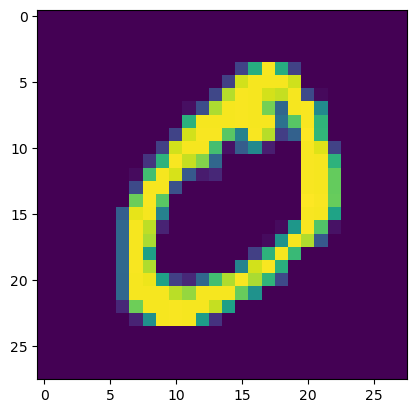

In [41]:
plt.imshow(X_train[1])

In [42]:
X_train = X_train/255
X_test = X_test/255

In [43]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [44]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               100480    
                                                                 
 dense_12 (Dense)            (None, 32)                4128      
                                                                 
 dense_13 (Dense)            (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [52]:
# Reshape data to include channel dimension (for grayscale images)
X_train_split = X_train_split.reshape((X_train_split.shape[0], 28, 28, 1))
X_val_split = X_val_split.reshape((X_val_split.shape[0], 28, 28, 1))

# Initialize ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)

datagen.fit(X_train_split)

# Initialize EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model using the training generator and validation data with EarlyStopping
history = model.fit(
    datagen.flow(X_train_split, y_train_split, batch_size=32),
    epochs=35,
    validation_data=(X_val_split, y_val_split),
    callbacks=[early_stopping]
)


Epoch 1/35
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3356 - accuracy: 0.8913 - val_loss: 0.1159 - val_accuracy: 0.9653
Epoch 2/35
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1618 - accuracy: 0.9499 - val_loss: 0.0795 - val_accuracy: 0.9758
Epoch 3/35
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1286 - accuracy: 0.9601 - val_loss: 0.0697 - val_accuracy: 0.9776
Epoch 4/35
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1104 - accuracy: 0.9650 - val_loss: 0.0726 - val_accuracy: 0.9781
Epoch 5/35
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1016 - accuracy: 0.9681 - val_loss: 0.0590 - val_accuracy: 0.9812
Epoch 6/35
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0948 - accuracy: 0.9700 - val_loss: 0.0677 - val_accuracy: 0.9782
Epoch 7/35
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0884 - accuracy: 0.9724 - val_loss: 0.0569 -

In [54]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [55]:
y_pred = y_prob.argmax(axis=1)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9873

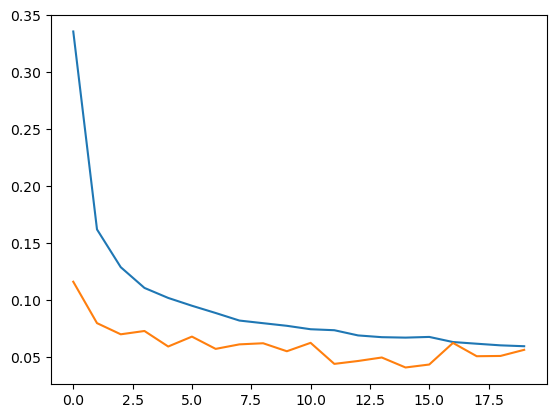

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

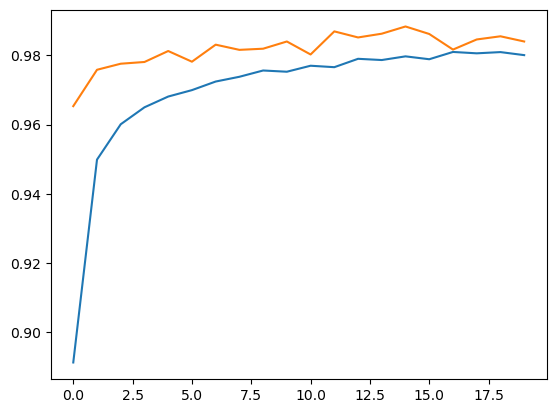

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [59]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 43ms/step


array([2], dtype=int64)

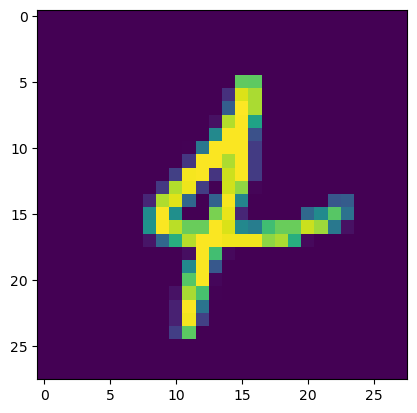

In [74]:
plt.imshow(X_test[300])

In [76]:
model.predict(X_test[300].reshape(1,28,28)).argmax(axis=1)


1/1 [==============================] - 0s 46ms/step


array([4], dtype=int64)